# Домашнее задание модуля 4
## Вторая часть.

Пусть все население (N индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t); зараженные индивиды (infected) — I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t).

Примем, что: 
S(t)+I(t)+R(t) = N 
(1)
Считаем, что когда число инфицированных превышает некое фиксированное значение I, скорость изменения числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов.
dS/dt = −αS 
(2)
Теперь, когда каждый восприимчивый к болезни индивид в конце концов заболевает и становится инфекционным, то скорость изменения инфицированных индивидов это разность за единицу времени между вновь заболевшими и теми кто выздоравливает.
dI/dt = αS−βI 
(3)
Постоянные пропорциональности α и β называют коэффициентами заболеваемости и выздоровления соответственно.

Скорость изменения числа выздоравливающих индивидов:
dR/dt = βI
(4)
Для того, чтобы решения соответствующих уравнений определялись однозначно, необходимо задать начальные условия. Примем, что:

α = 0.5
β = 0.3
N = 1000000
S(0) = 990000
I(0) = 7000
R(0) = 3000
t0, tf = 0,25
Необходимо выполнить:

1. Решить дифференциальное уравнение (2) и построить график функции S(t)


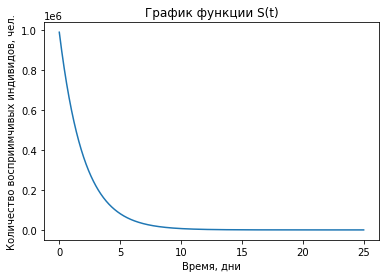

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Задаем начальные условия
N = 1000000
S0, I0, R0 = 990000, 7000, 3000
alpha, beta = 0.5, 0.3

# Задаем функцию, которую нужно решить
def deriv(t, y):
    S = y[0]
    dSdt = -alpha*S
    return dSdt

# Задаем временной интервал
t0, tf = 0, 25
t_eval = np.linspace(t0, tf, 1000)

# Решаем дифференциальное уравнение
sol_S = solve_ivp(deriv, [t0, tf], [S0], t_eval=t_eval)

# Строим график функции S(t)
plt.plot(sol_S.t, sol_S.y[0])
plt.xlabel('Время, дни')
plt.ylabel('Количество восприимчивых индивидов, чел.')
plt.title('График функции S(t)')
plt.show()


2. Решить дифференциальное уравнение (3) и построить график функции I(t)

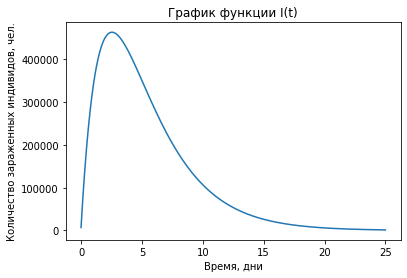

In [43]:
# Задаем функцию, которую нужно решить
def deriv(t, y):
    S, I, R = y
    dSdt = -alpha*S
    dIdt = alpha*S - beta*I
    dRdt = beta*I
    return dSdt, dIdt, dRdt

# Решаем дифференциальное уравнение
sol_I = solve_ivp(deriv, [t0, tf], [S0, I0, R0], t_eval=t_eval)

# Строим график функции I(t)
plt.plot(sol_I.t, sol_I.y[1])
plt.xlabel('Время, дни')
plt.ylabel('Количество зараженных индивидов, чел.')
plt.title('График функции I(t)')
plt.show()


3. Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interp1d) и построить график функции R(t)

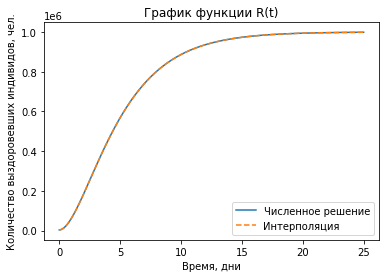

In [44]:
from scipy.interpolate import interp1d

# Находим значения функции I(t) на временной сетке t_eval
I_interp = interp1d(sol_I.t, sol_I.y[1])

# Находим значения функции R(t) на временной сетке t_eval
R = N - sol_I.y[0] - sol_I.y[1]
R_interp = interp1d(sol_I.t, R)

# Строим график функции R(t)
plt.plot(sol_I.t, R, label='Численное решение')
plt.plot(sol_I.t, R_interp(sol_I.t), '--', label='Интерполяция')
plt.xlabel('Время, дни')
plt.ylabel('Количество выздоровевших индивидов, чел.')
plt.title('График функции R(t)')
plt.legend()
plt.show()


4. Построить все три графика S(t),I(t) и R(t) на одной области отображения

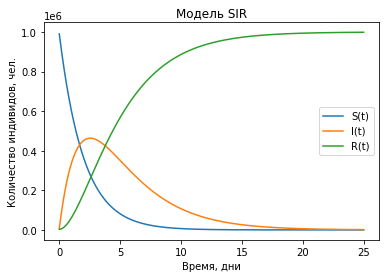

In [47]:

# Строим все три графика на одной области отображения
fig, ax = plt.subplots()
ax.plot(sol_S.t, sol_S.y[0], label='S(t)')
ax.plot(sol_I.t, sol_I.y[1], label='I(t)')
ax.plot(sol_I.t, R_interp(sol_I.t), label='R(t)')
ax.set_xlabel('Время, дни')
ax.set_ylabel('Количество индивидов, чел.')
ax.set_title('Модель SIR')
ax.legend()
plt.show()
